### Анализ тональности

### Загрузка данных и пакетов

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [159]:
print(df.shape)

(41157, 6)


In [160]:
df.sample(10, random_state=11)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
6356,10155,55107,YYZ/YYC/YUL/YOW,19-03-2020,Mass Store Closures in Canada Escalate Signifi...,Neutral
8701,12500,57452,???? ?? ???.,20-03-2020,"Thank you to all the nurses, doctors, grocery ...",Extremely Positive
1506,5305,50257,Los Angeles/London,17-03-2020,I just published Waking Up To a Coronavirus - ...,Neutral
35615,39414,84366,NaN,09-04-2020,Did you know that keeping your hands clean by ...,Extremely Positive
23990,27789,72741,"Azusa, CA",26-03-2020,Everyone is saying thank you to the health wor...,Negative
14753,18552,63504,"Bahawalpur,Pakistan",22-03-2020,At this hour it s no less than a blessing that...,Extremely Positive
37223,41022,85974,"Ramona, CA",10-04-2020,What do you think the behavior effects of #cor...,Positive
33478,37277,82229,"Cairo , Egypt",08-04-2020,@ronybut918 Consumer Behaviour COVID-19,Neutral
15789,19588,64540,PlanetJCG,22-03-2020,Too Sensible ? This was my request from a frie...,Extremely Positive
7888,11687,56639,Fiji,19-03-2020,As some people have now been made redundant fr...,Positive


In [161]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [162]:
df.duplicated().sum()

0

In [163]:
df = df[['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Визуализация

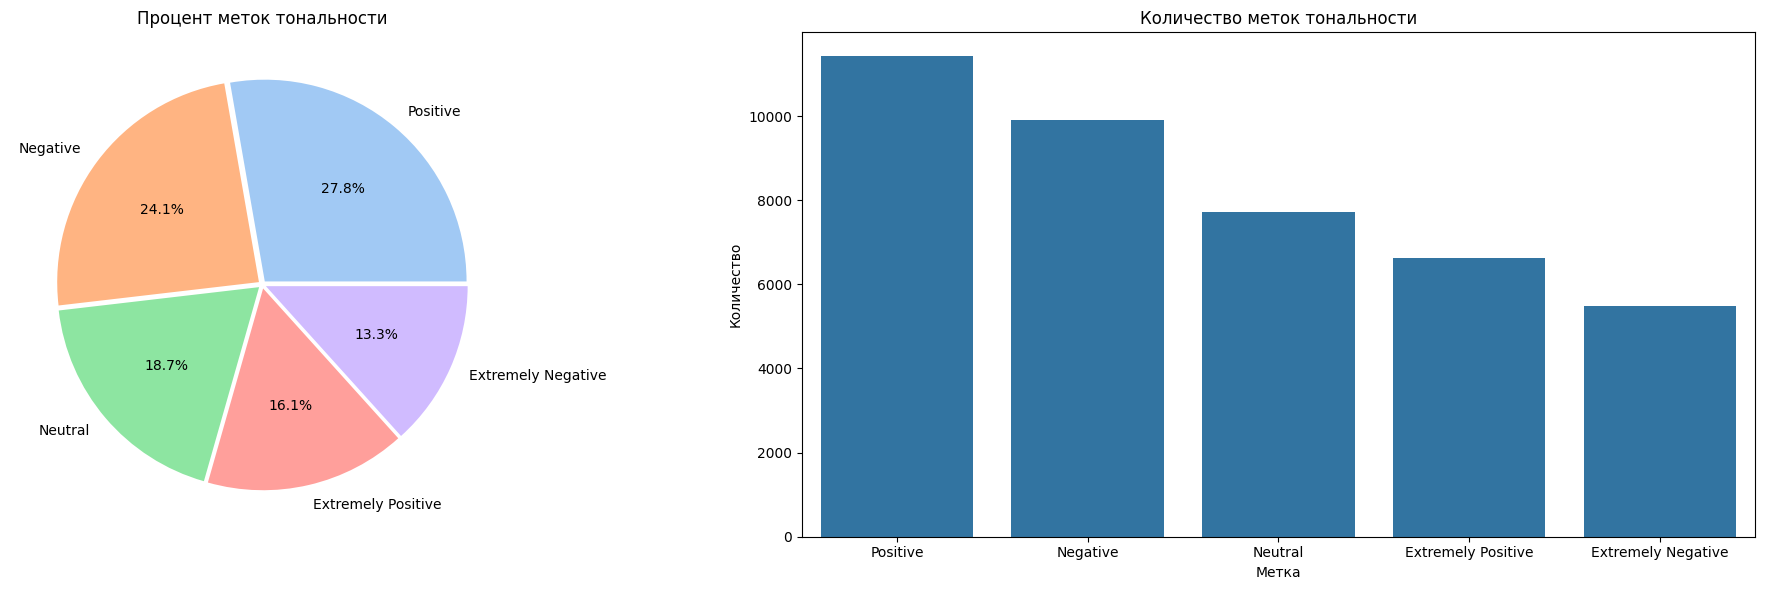

In [164]:
label_count = df['Sentiment'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Процент меток тональности')

# axes[1].bar(label_count.index, label_count.values)
sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Количество меток тональности')
axes[1].set_xlabel('Метка')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()



### Подсчет длины сообщений

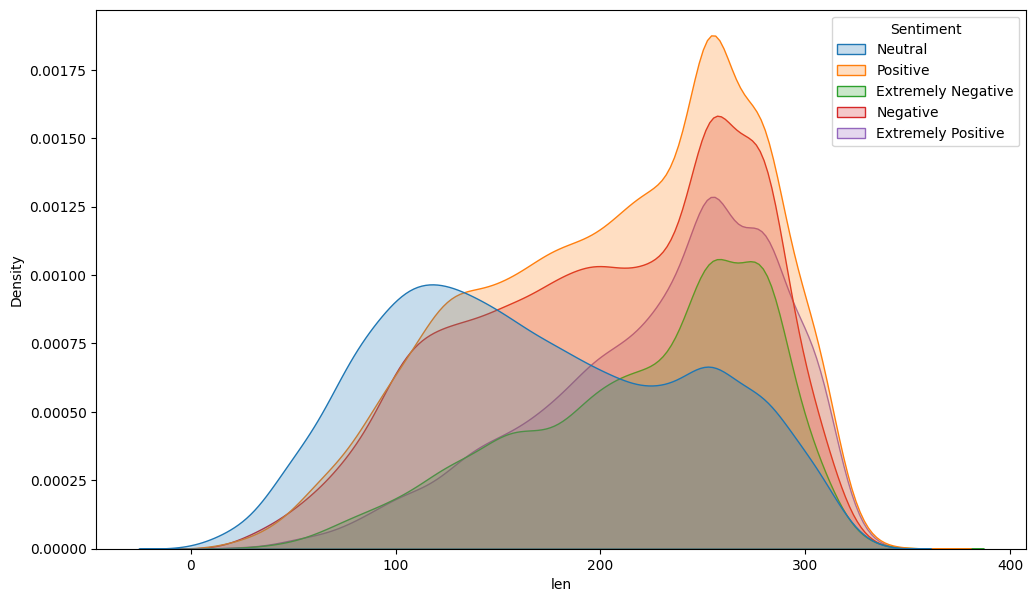

In [165]:
df['len'] = df['OriginalTweet'].apply(len)
plt.figure(figsize=(12, 7))
sns.kdeplot(df, x=df['len'], fill=True, hue='Sentiment')
plt.show()


### Bag of Words

In [166]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(df['OriginalTweet'])

In [167]:
matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1149620 stored elements and shape (41157, 80424)>

In [168]:
cv.get_feature_names_out()[15200:15210]

array(['certificates', 'certification', 'certifications', 'certified',
       'certosolution', 'cervini', 'cesarchavezday', 'cesspit', 'cest',
       'cet'], dtype=object)

In [170]:
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())

In [171]:
word_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Columns: 80424 entries, 00 to ã¼retime
dtypes: int64(80424)
memory usage: 24.7 GB


### Часто встречающиеся слова

In [172]:
df_sum = word_matrix.sum(axis=0, skipna=True)
bow = df_sum.sort_values(ascending=False)[:30]
bow = pd.DataFrame(bow, columns=['Frequency'])

In [173]:
bow

,Frequency
the,44869
to,38474
co,24121
and,24093
https,24007
of,21547
in,19316
coronavirus,18154
for,14059
19,12597


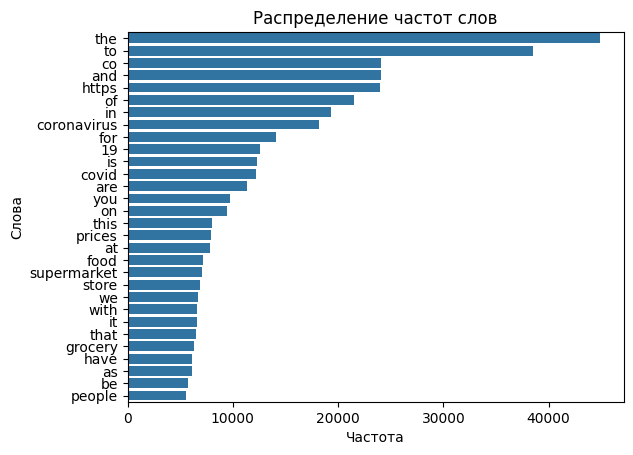

In [174]:
sns.barplot(x=bow['Frequency'], y=bow.index)
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.title('Распределение частот слов')
plt.show()